## Reflectivity example - Cairnside

Implications for seismic monitoring

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-white')
# plt.style.use('seaborn-paper')

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'axes.titlesize':'large',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

In [2]:
col_interest = ['Pressure (MPa)','Density (kg/m3)', 'Sound Spd. (m/s)']
CO2_25 = pd.read_csv('data/co2/25/co2_25.txt', delimiter="\t")
CO2_25 = CO2_25[col_interest]
CO2_25.columns = ['Pressure (MPa)', 'Density_CO2 (kg/m3)', 'Sound Spd_CO2 (m/s)' ]
CO2_35 = pd.read_csv('data/co2/35/co2_35.txt', delimiter="\t")
CO2_35 = CO2_35[col_interest]
CO2_35.columns = ['Pressure (MPa)', 'Density_CO2 (kg/m3)', 'Sound Spd_CO2 (m/s)']
H2O_25 = pd.read_csv('data/H2O/25/h2o_25.txt', delimiter="\t")
H2O_25 = H2O_25[col_interest]
H2O_25.columns = ['Pressure (MPa)', 'Density_H2O (kg/m3)', 'Sound Spd_H2O (m/s)']
H2O_35 = pd.read_csv('data/H2O/35/h2o_35.txt', delimiter="\t")
H2O_35 = H2O_35[col_interest]
H2O_35.columns = ['Pressure (MPa)', 'Density_H2O (kg/m3)', 'Sound Spd_H2O (m/s)']

In [3]:
H2O_25.head(10)

,Pressure (MPa),Density_H2O (kg/m3),Sound Spd_H2O (m/s)
0,0.00000,0.000000,427.63
1,0.00317,0.023075,426.63
2,0.00317,997.000000,1496.50
3,1.00000,997.450000,1498.20
4,2.00000,997.900000,1499.90
5,3.00000,998.350000,1501.60
6,4.00000,998.800000,1503.20
7,5.00000,999.250000,1504.90
8,6.00000,999.690000,1506.60
9,7.00000,1000.100000,1508.30


### Cairnside physical properties

In [4]:
porosity = 0.11# 0.0335
grain_density = 2.632 * 1000 # Kg/m3

#  read velocities from laboratory measurments
Vp_25 = pd.read_csv('data/CAS/25/Vp.dat', sep="  ", names=['Pressure (MPa)','Vp_CO2 (m/s)'], header=None)
Vs_25 = pd.read_csv('data/CAS/25/Vs.dat', sep="  ", names=['Pressure (MPa)','Vs_CO2 (m/s)'], header=None)
Vp_35 = pd.read_csv('data/CAS/35/Vp.dat', sep="  ", names=['Pressure (MPa)','Vp_CO2 (m/s)'], header=None)
Vs_35 = pd.read_csv('data/CAS/35/Vs.dat', sep="  ", names=['Pressure (MPa)','Vs_CO2 (m/s)'], header=None)
Vp_25_dry = pd.read_csv('data/CAS/dry/Vp.dat', sep="  ", names=['Pressure (MPa)','Vp_dry (m/s)'], header=None)
Vs_25_dry = pd.read_csv('data/CAS/dry/Vs.dat', sep="  ", names=['Pressure (MPa)','Vs_dry (m/s)'], header=None)

# concatenate velocities
V_25 = pd.merge(Vp_25, Vs_25, on='Pressure (MPa)')
V_25 = pd.merge(V_25, Vp_25_dry, on='Pressure (MPa)')
V_25 = pd.merge(V_25, Vs_25_dry, on='Pressure (MPa)')
V_35 = pd.merge(Vp_35, Vs_35, on='Pressure (MPa)')
# concatenate physical properties
pp_25 = pd.merge(CO2_25, H2O_25, on='Pressure (MPa)')
pp_35 = pd.merge(CO2_35, H2O_35, on='Pressure (MPa)')
pp_25 = pd.merge(pp_25, V_25, on='Pressure (MPa)')
pp_35 = pd.merge(pp_35, V_35, on='Pressure (MPa)')
pp_25

/Users/lorenzoperozzi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/lorenzoperozzi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/lorenzoperozzi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/lorenzoperozzi/anacon

,Pressure (MPa),Density_CO2 (kg/m3),Sound Spd_CO2 (m/s),Density_H2O (kg/m3),Sound Spd_H2O (m/s),Vp_CO2 (m/s),Vs_CO2 (m/s),Vp_dry (m/s),Vs_dry (m/s)
0,3.0,64.091,243.76,998.35,1501.6,4632.6235,3243.1127,4059.7284,2995.8948
1,5.0,131.270,220.79,999.25,1504.9,4605.1651,3229.6318,4164.1486,3047.5880
2,7.0,743.030,320.36,1000.10,1508.3,4660.4113,3243.1127,4269.4554,3093.4569
3,11.0,832.570,456.41,1001.90,1514.9,4749.9563,3264.5258,4465.3943,3184.8281
4,13.0,856.870,496.64,1002.80,1518.3,4758.2677,3270.4149,4558.0285,3225.1916
5,15.0,876.470,530.04,1003.70,1521.6,4774.9781,3276.3253,4623.6889,3253.3743
6,23.0,932.250,629.67,1007.10,1535.0,4830.1066,3278.3002,4832.6729,3363.6361
7,25.0,942.980,649.71,1008.00,1538.3,4843.0098,3280.2774,4869.3403,3380.3320


In [5]:
# Density of CO2 saturated sample
pp_25['Density_rock_CO2 (kg/m3)'] = pp_25['Density_CO2 (kg/m3)'] * porosity + grain_density * (1-porosity)
pp_35['Density_rock_CO2 (kg/m3)'] = pp_35['Density_CO2 (kg/m3)'] * porosity + grain_density * (1-porosity)

In [6]:
# Impedence of CO2 saturated sample
pp_25['Zp_CO2 (kg/m3 . m/s)'] = (pp_25['Density_rock_CO2 (kg/m3)'] * pp_25['Vp_CO2 (m/s)']) / 1e6
pp_35['Zp_CO2 (kg/m3 . m/s)'] = (pp_35['Density_rock_CO2 (kg/m3)'] * pp_35['Vp_CO2 (m/s)']) / 1e6

pp_25['Zs_CO2 (kg/m3 . m/s)'] = (pp_25['Density_rock_CO2 (kg/m3)'] * pp_25['Vs_CO2 (m/s)']) / 1e6
pp_35['Zs_CO2 (kg/m3 . m/s)'] = (pp_35['Density_rock_CO2 (kg/m3)'] * pp_35['Vs_CO2 (m/s)']) / 1e6

### Water velocities calculations @ 25ºC

In [7]:
pp_25

,Pressure (MPa),Density_CO2 (kg/m3),Sound Spd_CO2 (m/s),Density_H2O (kg/m3),Sound Spd_H2O (m/s),Vp_CO2 (m/s),Vs_CO2 (m/s),Vp_dry (m/s),Vs_dry (m/s),Density_rock_CO2 (kg/m3),Zp_CO2 (kg/m3 . m/s),Zs_CO2 (kg/m3 . m/s)
0,3.0,64.091,243.76,998.35,1501.6,4632.6235,3243.1127,4059.7284,2995.8948,2349.53001,10.884488,7.619791
1,5.0,131.270,220.79,999.25,1504.9,4605.1651,3229.6318,4164.1486,3047.5880,2356.91970,10.854004,7.611983
2,7.0,743.030,320.36,1000.10,1508.3,4660.4113,3243.1127,4269.4554,3093.4569,2424.21330,11.297831,7.861997
3,11.0,832.570,456.41,1001.90,1514.9,4749.9563,3264.5258,4465.3943,3184.8281,2434.06270,11.561691,7.946060
4,13.0,856.870,496.64,1002.80,1518.3,4758.2677,3270.4149,4558.0285,3225.1916,2436.73570,11.594641,7.969137
5,15.0,876.470,530.04,1003.70,1521.6,4774.9781,3276.3253,4623.6889,3253.3743,2438.89170,11.645654,7.990603
6,23.0,932.250,629.67,1007.10,1535.0,4830.1066,3278.3002,4832.6729,3363.6361,2445.02750,11.809743,8.015534
7,25.0,942.980,649.71,1008.00,1538.3,4843.0098,3280.2774,4869.3403,3380.3320,2446.20780,11.847008,8.024240


In [8]:
### Gassmann parameters for Vp_h2o calculation
K_dry = 18.70 * 1e9# Gpa
# K_dry = pp_25['Vp_dry (m/s)']**2 * grain_density * (1-porosity) - 4/3*
K_s = 62.76 *1e9 #Gpa
K_h2o = (pp_25['Sound Spd_H2O (m/s)']**2 * pp_25['Density_H2O (kg/m3)'] ) 
G = 25.69 * 1e9# Gpa
# G = pp_25['Density_rock_CO2 (kg/m3)'] * pp_25['Vs_CO2 (m/s)'] ** 2
# G_dry = (grain_density * (1-porosity)) * pp_25['Vs_dry (m/s)']
# K_dry = (pp_25['Vp_dry (m/s)']**2) * (grain_density * (1-porosity)) - 4/3*G_dry

# G = (1 - porosity) * grain_density * pp_25['Vs_dry (m/s)']**2


upper = (1 - (K_dry/K_s))**2
lower = (porosity/K_h2o) + ((1-porosity)/K_s) - (K_dry/K_s**2)
K = K_dry + (upper)/(lower)

pp_25['Density_rock_H2O (kg/m3)'] = pp_25['Density_H2O (kg/m3)'] * porosity + grain_density * (1-porosity)
# pp_35['Density_rock_H2O (kg/m3)'] = pp_35['Density_H2O (kg/m3)'] * porosity + grain_density * (1-porosity)

pp_25['Vp_H2O (m/s)'] = np.sqrt((K + 4/3*G) / pp_25['Density_rock_H2O (kg/m3)'])
pp_25['Vs_H2O (m/s)'] = np.sqrt(G / pp_25['Density_rock_H2O (kg/m3)'])

pp_25['Zp_H2O (kg/m3 . m/s)'] = (pp_25['Density_rock_H2O (kg/m3)'] * pp_25['Vp_H2O (m/s)']) / 1e6
pp_25['Zs_H2O (kg/m3 . m/s)'] = (pp_25['Density_rock_H2O (kg/m3)'] * pp_25['Vs_H2O (m/s)']) / 1e6

### Impedance of CO2 saturated and H2O saturated cairnside sample

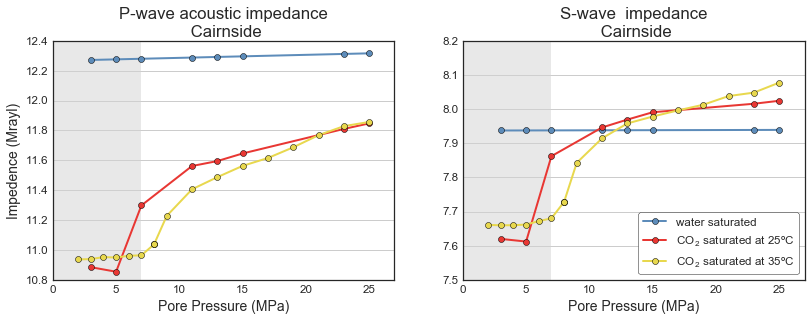

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(12,4))

# plt.subplot(1,2,1)
ax1.plot(pp_25['Pressure (MPa)'], pp_25['Zp_CO2 (kg/m3 . m/s)'], marker='o', color='#E83733', linewidth=2)
ax1.plot(pp_35['Pressure (MPa)'], pp_35['Zp_CO2 (kg/m3 . m/s)'], marker='o', color='#E8D84E', linewidth=2)
ax1.plot(pp_25['Pressure (MPa)'], pp_25['Zp_H2O (kg/m3 . m/s)'], marker='o', color='#5D8CBA', linewidth=2)
ax1.yaxis.grid(True)
ax1.set_xlim([0,27])
ax2.set_ylim([10.6,12.6])
ax1.set_xlabel('Pore Pressure (MPa)')
ax1.set_ylabel('Impedence (Mrayl)')
ax1.set_title('P-wave acoustic impedance\n Cairnside')
ax1.axvspan(0, 7, color='#D3D3D3', alpha=0.5, lw=0)


# plt.subplot(1,2,2)
ax2.plot(pp_25['Pressure (MPa)'], pp_25['Zs_H2O (kg/m3 . m/s)'], marker='o', color='#5D8CBA', linewidth=2, label= 'water saturated')
ax2.plot(pp_25['Pressure (MPa)'], pp_25['Zs_CO2 (kg/m3 . m/s)'], marker='o', color='#E83733', linewidth=2, label= r'$\mathregular{CO_2}$ saturated at 25ºC')
ax2.plot(pp_35['Pressure (MPa)'], pp_35['Zs_CO2 (kg/m3 . m/s)'], marker='o', color='#E8D84E', linewidth=2, label= r'$\mathregular{CO_2}$ saturated at 35ºC')

ax2.yaxis.grid(True)
ax2.set_xlim([0,27])
ax2.set_ylim([7.5,8.2])
ax2.set_xlabel('Pore Pressure (MPa)')
legend = ax2.legend(loc='lower right', frameon=True, fancybox=True)
frame = legend.get_frame()
frame.set_facecolor('white')
ax2.set_title('S-wave  impedance\n Cairnside')
ax2.axvspan(0, 7, color='#D3D3D3', alpha=0.5, lw=0)
plt.savefig("fig/impedance_CAS.pdf", bbox_inches='tight')


### Reflectivity

For the simplest case of normal incidence seismic reflections from the interface between two elastic materials, the reflection co-efficient R of the reflected wave normalized with respect to the amplitude of the incident wave is

$$ R = \frac{Z_2 - Z1}{Z_2 + Z_1}$$

where $Zi = V  \rho$ is the acoustic impedance that is the simple product of the wave speed and the material density and medium 1 and 2 are the upper and lower material layers, respectively.

Imagine an hypothetical geological structure consisting of a formation with the acoustic properties of cairnside sample that has a fully CO2-saturated zone immediately overlying a fully water-saturated zone.

In [10]:
pp_25['R_p'] = (pp_25['Zp_H2O (kg/m3 . m/s)'] - pp_25['Zp_CO2 (kg/m3 . m/s)']) / (pp_25['Zp_H2O (kg/m3 . m/s)'] + pp_25['Zp_CO2 (kg/m3 . m/s)'])
pp_25['R_s'] = (pp_25['Zs_H2O (kg/m3 . m/s)'] - pp_25['Zs_CO2 (kg/m3 . m/s)']) / (pp_25['Zs_H2O (kg/m3 . m/s)'] + pp_25['Zs_CO2 (kg/m3 . m/s)'])

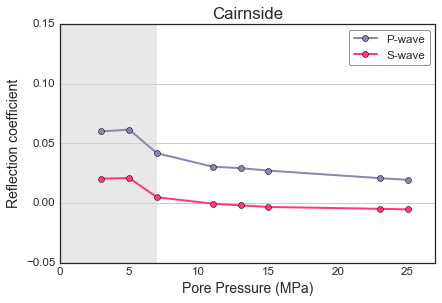

In [11]:
fig, ax1 = plt.subplots(nrows=1,ncols=1, figsize=(6,4))

# plt.subplot(1,2,1)
ax1.plot(pp_25['Pressure (MPa)'], pp_25['R_p'], marker='o', color='#8688B1', linewidth=2, label= 'P-wave')
ax1.plot(pp_25['Pressure (MPa)'], pp_25['R_s'], marker='o', color='#FF3B72',linewidth=2 ,label= 'S-wave')
# ax1.plot(pp_25['Pressure (MPa)'], pp_25['Zp_H2O (kg/m3 . m/s)'], marker='^')
ax1.yaxis.grid(True)
ax1.set_xlim([0,27])
ax1.set_xlabel('Pore Pressure (MPa)')
ax1.set_ylabel('Reflection coefficient')
ax1.set_ylim([-0.05,0.15])
legend = ax1.legend(loc='upper right', frameon=True, fancybox=True)
frame = legend.get_frame()
frame.set_facecolor('white')
ax1.set_title('Cairnside')
ax1.axvspan(0, 7, color='#D3D3D3', alpha=0.5, lw=0)
plt.savefig("fig/reflectivity_CAS.pdf", bbox_inches='tight')